In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("co2.csv" , usecols = ["Cylinders","Engine Size(L)","Fuel Consumption City (L/100 km)",
                                        "CO2 Emissions(g/km)"])
df.shape

(7385, 4)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("CO2 Emissions(g/km)",axis = 1),
                                                    df["CO2 Emissions(g/km)"],
                                                    test_size = 0.2 , random_state= 0)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)

In [15]:
from sklearn.metrics import r2_score , mean_squared_error , root_mean_squared_error , mean_absolute_error
print("R2 Score:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",root_mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test , y_pred))

R2 Score: 0.8689836337047152
MSE: 448.81250553971415
RMSE: 21.185195433125326
MAE: 14.362511865834174


# **How to Find MultiCollinearirty in Data**

# **1. Correlation Matrix**

Text(0.5, 1.0, 'MultiCollinearity')

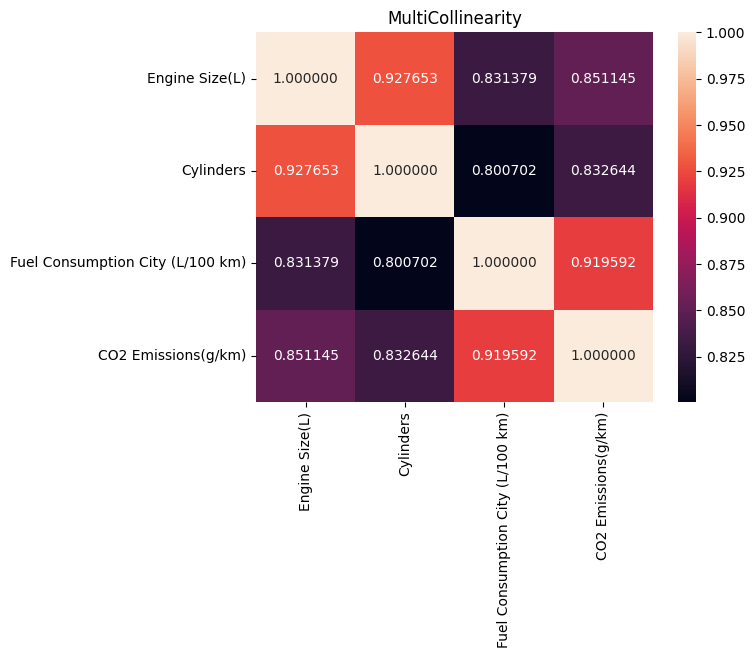

In [17]:
cm = df.corr()
sns.heatmap(cm , annot = True , fmt ="f")
plt.title("MultiCollinearity")

# **2. VIF (Variance Inflation Factor)**

**Note : If VIF is greater then 10 it is considered to be high Multicollinearity in data**

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Cols"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values , i) for i in  range(df.shape[1])]
vif

,Cols,VIF
0,Engine Size(L),41.411483
1,Cylinders,72.365368
2,Fuel Consumption City (L/100 km),94.976739
3,CO2 Emissions(g/km),106.157981


# **With Elastic Net Regression**

In [29]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train , y_train)

ElasticNet()

In [34]:
en_y_pred = en.predict(X_test)

In [35]:
print("R2 Score:",r2_score(y_test,en_y_pred))
print("MSE:",mean_squared_error(y_test,en_y_pred))
print("RMSE:",root_mean_squared_error(y_test,en_y_pred))
print("MAE:",mean_absolute_error(y_test , en_y_pred))

R2 Score: 0.866963324604886
MSE: 455.7333202035511
RMSE: 21.34791137801427
MAE: 14.71242366910588
